#**A3.2 Redes Neuronales**
###Jesus Esteban Bustamante Apodaca
Entrena un modelo de redes neuronales para clasificar los dígitos del 0 al 9, y muestra
mediante gráficas el comportamiento del sistema a lo largo del entrenamiento. Especifica
la exactitud del modelo tanto en entrenamiento como en validación.

2.18.0
4.11.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Distribución de clases en el set de entrenamiento:
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes


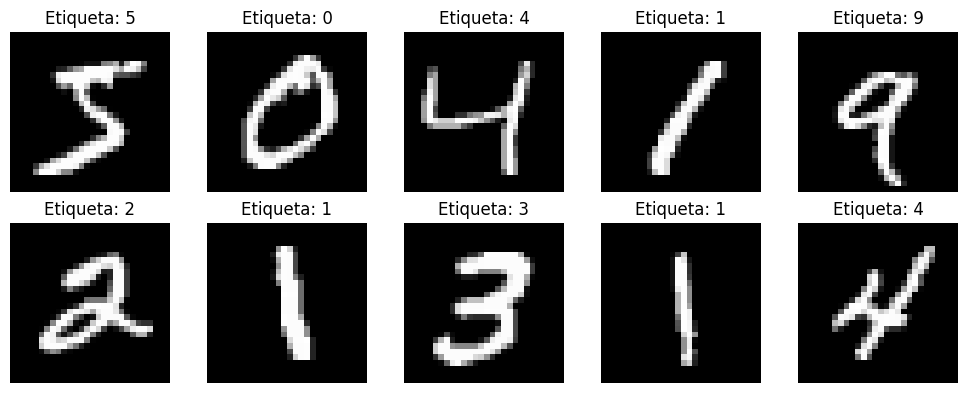


Valores mínimos y máximos de los pixeles:
Valor mínimo: 0
Valor máximo: 255


In [ ]:
#Exploración de los datos
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import cv2
print(cv2.__version__)

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import collections
train_label_counts = collections.Counter(train_labels)
print("\nDistribución de clases en el set de entrenamiento:")
for label in sorted(train_label_counts.keys()):
    print(f"Clase {label}: {train_label_counts[label]} imágenes")

# Mostrar algunas imágenes
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Revisar rango de valores de pixeles
print("\nValores mínimos y máximos de los pixeles:")
print(f"Valor mínimo: {train_images.min()}")
print(f"Valor máximo: {train_images.max()}")

In [ ]:
#Construcción de feedforward neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, ELU, PReLU
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# === Normalizar imágenes (0-1) ===
train_images = train_images / 255.0
test_images = test_images / 255.0

model = Sequential()
# Construcción de la red neuronal
model.add(Flatten(input_shape=(28, 28)))

# Capa oculta 1
model.add(Dense(128, activation='relu'))

# Capa oculta 2
model.add(Dense(64, activation='relu'))

# Capa oculta 3
#model.add(Dense(32, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

optimizador = Adam(learning_rate=0.001)  # ← Usamos Adam por defecto

# Compilar el modelo
model.compile(
    optimizer=optimizador,
    loss='sparse_categorical_crossentropy',  # Porque las etiquetas son enteros (0–9)
    metrics=['accuracy']
)
# Mostrar resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir early stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,                # Número de épocas sin mejora antes de detener
    restore_best_weights=True # Recupera los mejores pesos al final
)

# Entrenar el modelo
history = model.fit(
    train_images, train_labels,
    epochs=50,
    validation_split=0.4,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8524 - loss: 0.5352 - val_accuracy: 0.9527 - val_loss: 0.1605
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9603 - loss: 0.1305 - val_accuracy: 0.9621 - val_loss: 0.1320
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9752 - loss: 0.0783 - val_accuracy: 0.9669 - val_loss: 0.1111
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9828 - loss: 0.0543 - val_accuracy: 0.9658 - val_loss: 0.1152
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9872 - loss: 0.0413 - val_accuracy: 0.9673 - val_loss: 0.1135
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9708 - val_loss: 0.1079
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9716 - val_loss: 0.1129
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9933 - loss: 0.022

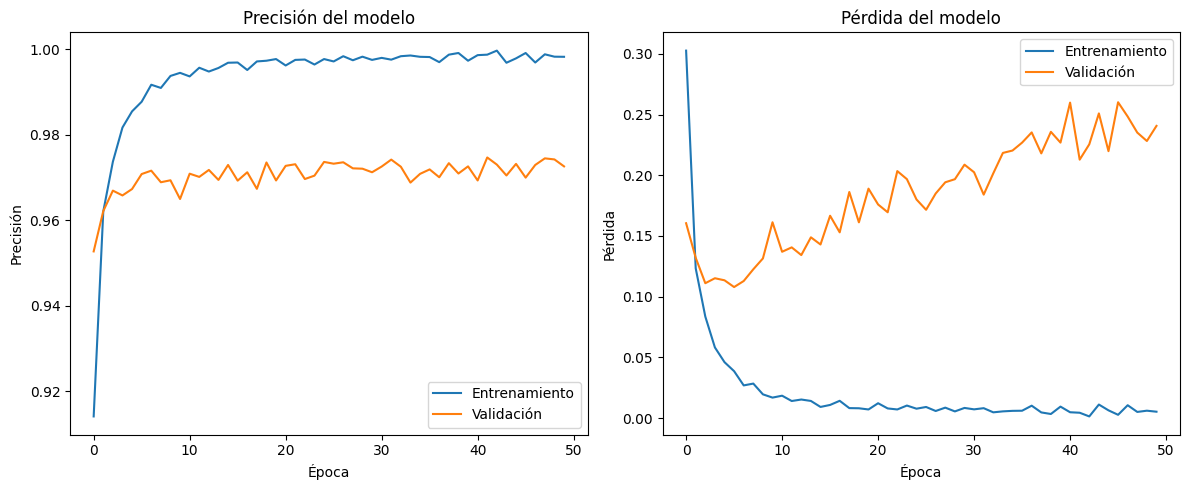

In [ ]:
import matplotlib.pyplot as plt

# Visualizar precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Visualizar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


### Evalúa la exactitud del modelo en el conjunto de prueba generado al cargar la base de datos y compárala con la exactitud de validación del modelo. Realiza un comentario sobre los resultados de dicha comparación.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'Exactitud del modelo de prueba: {test_accuracy}')
print(f'Exactitud del modelo de validación: {history.history["val_accuracy"][-1]}')

if test_accuracy > history.history['val_accuracy'][-1]:
  print("La exactitud prueba es mayor que la exactitud de validación.")
elif test_accuracy < history.history['val_accuracy'][-1]:
  print("La exactitud de prueba es menor que la exactitud de validación.")
else:
  print("La exactitud es igual a la exactitud de validación.")

Exactitud del modelo de prueba: 0.9771999716758728
Exactitud del modelo de validación: 0.9725833535194397
La exactitud prueba es mayor que la exactitud de validación.


De acuerdo con ChatGPT, este modelo y el resultado de la exactitud y de la grafica muestra que el modelo generaliza bien aunque con un poco de overfitting pero segun Chat es aceptable y no dara problemas, por lo tanto este modelo parece funcionar correctamente.

###Genera 50 imágenes, 5 para cada dígito. Preprocesa las imágenes para que puedan ser evaluadas por el modelo, de forma similar a como se realizó en el taller.

Carga de la base de datos de EMNIST

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import cv2
import os

# Cargar EMNIST Digits (otra base de datos diferente a MNIST)
ds = tfds.load('emnist/digits', split='test', shuffle_files=True)

Generacion de 50 imagenes con 5 imagenes de cada numero del 0 al 9


In [ ]:
# Crear carpeta donde guardar imágenes
output_folder = '/content/emnist_digitos_50'
os.makedirs(output_folder, exist_ok=True)

# Inicializar contadores para tener 5 imágenes de cada número
contador = {i: 0 for i in range(10)}

# Listas para guardar imágenes y etiquetas
imagenes_preprocesadas = []
etiquetas_preprocesadas = []

# Recorrer el dataset
for example in tfds.as_numpy(ds):
    imagen = example['image']
    etiqueta = example['label']

    if contador[etiqueta] < 5:
        # Procesar imagen
        imagen = imagen.squeeze()  # Eliminar eje extra
        imagen = imagen.astype('float32') / 255.0  # Normalizar

        # Guardar imagen para predicción
        imagenes_preprocesadas.append(imagen)
        etiquetas_preprocesadas.append(etiqueta)

        # Guardar imagen como JPG visual
        nombre_archivo = f"{etiqueta}_{contador[etiqueta]+1}.jpg"
        ruta_guardado = os.path.join(output_folder, nombre_archivo)

        imagen_para_guardar = (imagen * 255).astype(np.uint8)
        cv2.imwrite(ruta_guardado, imagen_para_guardar)

        contador[etiqueta] += 1

    if all(c == 5 for c in contador.values()):
        break

# Convertir a arrays
imagenes_preprocesadas = np.array(imagenes_preprocesadas)
etiquetas_preprocesadas = np.array(etiquetas_preprocesadas)

print(f"50 imágenes de EMNIST Digits en: {output_folder}")
print(f"Forma de las imágenes preprocesadas: {imagenes_preprocesadas.shape}")

50 imágenes de EMNIST Digits en: /content/emnist_digitos_50
Forma de las imágenes preprocesadas: (50, 28, 28)


In [ ]:
# Acomodar imágenes
imagenes_preprocesadas = imagenes_preprocesadas.reshape((-1, 28, 28))

# Evaluar modelo
predicciones = model.predict(imagenes_preprocesadas)
labels_predichos = np.argmax(predicciones, axis=1)

# Calcular precisión
accuracy = np.mean(labels_predichos == etiquetas_preprocesadas)
print(f"Precisión del modelo en EMNIST Digits: {accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Precisión del modelo en EMNIST Digits: 0.12


El modelo tuvo una precision baja debido a que y coroborado por ChatGPT, fue entrenado solo con números muy limpios de MNIST, y al ponerle números más feos y deformes de EMNIST no supo reconocerlos. Como nunca vio ese tipo de imágenes, no aprendió a generalizar bien. Además, la red que usamos no es muy buena para entender formas raras, solo aprendió a ver lo que ya conocía.

###Genera 3 mejoras, innovaciones, o adiciones al sistema actual (pueden ser para cualquier etapa, desde la carga de datos, hasta los resultados de la predicción). Indica claramente qué se hizo, por qué, y si culminaron en mejoras en la predicción o en la funcionalidad del sistema.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - accuracy: 0.8110 - loss: 0.5826 - val_accuracy: 0.9839 - val_loss: 0.0493
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9612 - loss: 0.1256 - val_accuracy: 0.9874 - val_loss: 0.0376
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9740 - loss: 0.0853 - val_accuracy: 0.9888 - val_loss: 0.0322
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9779 - loss: 0.0706 - val_accuracy: 0.9840 - val_loss: 0.0450
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9819 - loss: 0.0581 - val_accuracy: 0.9902 - val_loss: 0.0331
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.9930 - val_loss: 0.0200
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.9845 - loss: 0.0491 - val_accuracy: 0.9904 - val_loss: 0.0272
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9863 - loss: 0.04

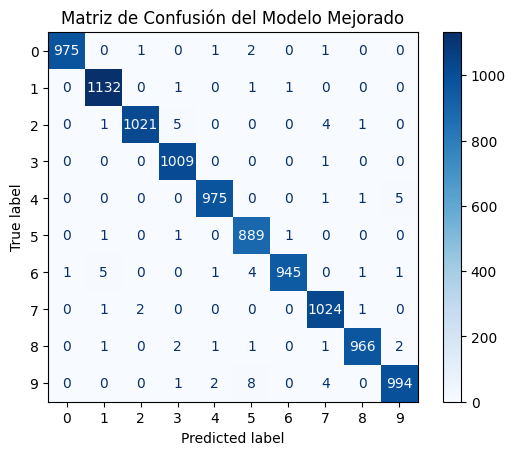

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ======== Cargar dataset MNIST ========
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# ======== Preprocesar datos ========
# Expandir dimensiones para que tengan formato (28, 28, 1)
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# ======== Crear generador de Data Augmentation ========
datagen = ImageDataGenerator(
    rotation_range=15,        # Rotación aleatoria
    width_shift_range=0.1,    # Desplazamiento horizontal
    height_shift_range=0.1,   # Desplazamiento vertical
    zoom_range=0.1            # Zoom aleatorio
)
datagen.fit(train_images)

# ======== Definir modelo CNN ========
model = Sequential()

# Capas convolucionales
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Capas densas
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilar modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostrar arquitectura del modelo
model.summary()

# ======== Entrenar modelo usando Data Augmentation ========
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=15,
    validation_data=(test_images, test_labels)
)

# ======== Evaluar el modelo ========
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nPrecisión en test set: {test_acc*100:.2f}%")

# ======== Matriz de confusión ========
# Predecir etiquetas
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Crear matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)

#Guardar Modelo
model.save('/content/mi_modelo_mejorado.h5')

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión del Modelo Mejorado')
plt.show()

Estas mejoras fueron hechas con ayuda de ChatGPT, donde se aplicó aumento de datos para generar más variaciones en las imágenes, se cambió la red a una CNN para mejorar el reconocimiento de patrones, y se agregó una matriz de confusión para analizar errores. Viendo el resultado de la exactitud y matriz de confusion se puede apreciar que estas mejoras hicieron que el modelo fuera más preciso y entendible.

Captura una imagen del dígito que quieras predecir.


<IPython.core.display.Javascript object>

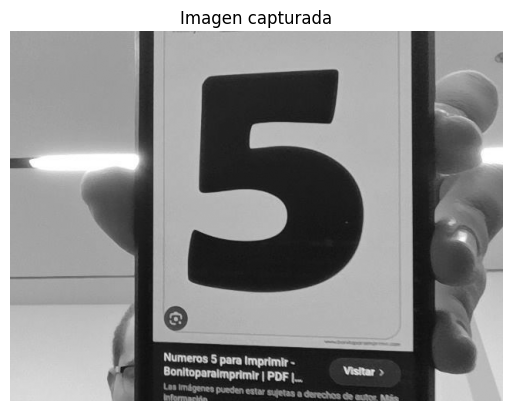

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ El modelo predice que es el número: 5


In [ ]:
# ======== Librerías necesarias ========
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ======== Función para tomar foto desde la webcam ========
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capturar Imagen';
      document.body.appendChild(div);
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      div.appendChild(video);
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ======== Capturar imagen ========
print("Captura una imagen del dígito que quieras predecir.")
filename = take_photo()

# ======== Procesar imagen ========
# Cargar imagen en escala de grises
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen capturada
plt.imshow(img, cmap='gray')
plt.title('Imagen capturada')
plt.axis('off')
plt.show()

# Binarizar (invertir colores)
_, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)

# Encontrar contornos para detectar el dígito
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Tomar el contorno más grande
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    # Recortar el dígito
    digit = thresh[y:y+h, x:x+w]

    # Redimensionar a 28x28
    resized = cv2.resize(digit, (28, 28))

    # Normalizar
    normalized = resized.astype('float32') / 255.0

    # Ajustar forma para el modelo
    input_img = normalized.reshape(1, 28, 28, 1)

    # ======== Predicción con el modelo entrenado ========
    prediction = model.predict(input_img)
    predicted_label = np.argmax(prediction)

    # Mostrar el resultado
    print(f"✅ El modelo predice que es el número: {predicted_label}")

else:
    print("⚠️ No se detectó ningún dígito en la imagen capturada.")